In [1]:
# importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\jyupter\project_file\Summer_Olympic_medals.csv', encoding='latin1')  # read file

#display first 5 entry
print(df.head())


#describe  about model
print(df.describe())


#give info about data
print(df.info())

       City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze  
               Year
count  15316.000000
mean    1993.620789
std       10.159851
min     1976

In [3]:
# Check for missing values
print(df.isnull().sum())


# Drop rows with missing values if any 
df_clean = df.dropna()



df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns.tolist())



City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64
['city', 'year', 'sport', 'discipline', 'event', 'athlete', 'gender', 'country_code', 'country', 'event_gender', 'medal']


In [4]:
# Full load once sample looks good
df = pd.read_csv("Summer_Olympic_medals.csv", encoding='latin1')

# Number of rows and columns
print("Shape:", df.shape)

# Count of unique values in key columns
print("Unique sports:", df['Sport'].nunique())
print("Unique athletes:", df['Athlete'].nunique())
print("Unique countries:", df['Country'].nunique())


Shape: (15433, 11)
Unique sports: 28
Unique athletes: 11337
Unique countries: 127


In [10]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB
None


In [ ]:
non_medal = df_full[df_full['Won_Medal'] == 0]  # use all available
medal     = df_full[df_full['Won_Medal'] == 1].sample(n=len(non_medal), random_state=42)

df_balanced = pd.concat([medal, non_medal]).sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:

# Count medals (excluding non-medal entries if they exist)
medal_counts = df['Medal'].value_counts()
print(medal_counts)


Medal
Bronze    5258
Gold      5042
Silver    5016
Name: count, dtype: int64


In [ ]:
top_sports = df["Sport"].value_counts().nlargest(10)
print(top_sports)


Sport
Aquatics         2210
Athletics        1523
Rowing           1377
Hockey            817
Gymnastics        783
Handball          780
Volleyball        695
Canoe / Kayak     672
Football          669
Basketball        646
Name: count, dtype: int64


In [ ]:
# Count male vs. female participants
gender_counts = df['Gender'].value_counts()
print(gender_counts)


Gender
Men      9388
Women    5928
Name: count, dtype: int64


In [ ]:
# Filter only medal winners
medalists = df[df['Medal'].notnull()]

# Count medals per country
top_countries = medalists['Country'].value_counts().nlargest(10)
print(top_countries)


Country
United States     1992
Soviet Union      1021
Australia          798
Germany            691
China              679
Russia             638
East Germany       626
Italy              486
Romania            482
United Kingdom     467
Name: count, dtype: int64


Year
1976.0    1305
1980.0    1387
1984.0    1459
1988.0    1546
1992.0    1705
dtype: int64


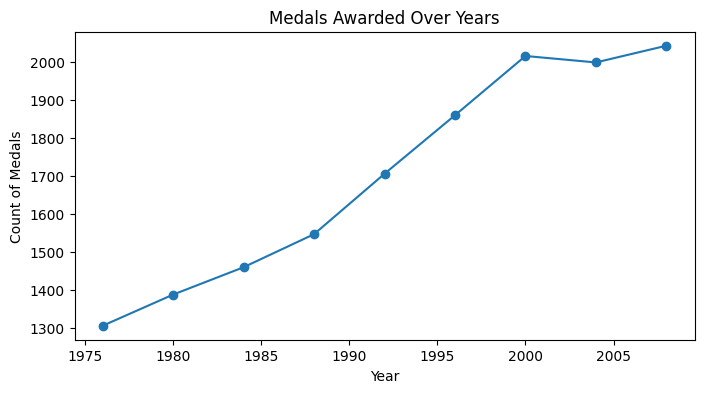

In [ ]:
yearly_medals = medalists.groupby("Year").size()
print(yearly_medals.head())

# Quick line plot
plt.figure(figsize=(8,4))
plt.plot(yearly_medals.index, yearly_medals.values, marker="o")
plt.title("Medals Awarded Over Years")
plt.xlabel("Year")
plt.ylabel("Count of Medals")
plt.show()


In [ ]:

#safe Participation Trend Plot
#Check if 'year' and 'athlete' columns exist
if 'year' in df.columns and 'athlete' in df.columns:
    participation_trend = df.groupby('year')['athlete'].count()
    participation_trend.plot(kind='line', title='Athlete Participation Over Years', figsize=(10,5))
    plt.xlabel('Year')
    plt.ylabel('Number of Athletes')
    plt.grid(True)
    plt.show()
else:
    print("Required columns 'year' and 'athlete' not found.")


Required columns 'year' and 'athlete' not found.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27212\2566273710.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_medals.values, y=country_medals.index,hue=None, palette="viridis",legend=False)


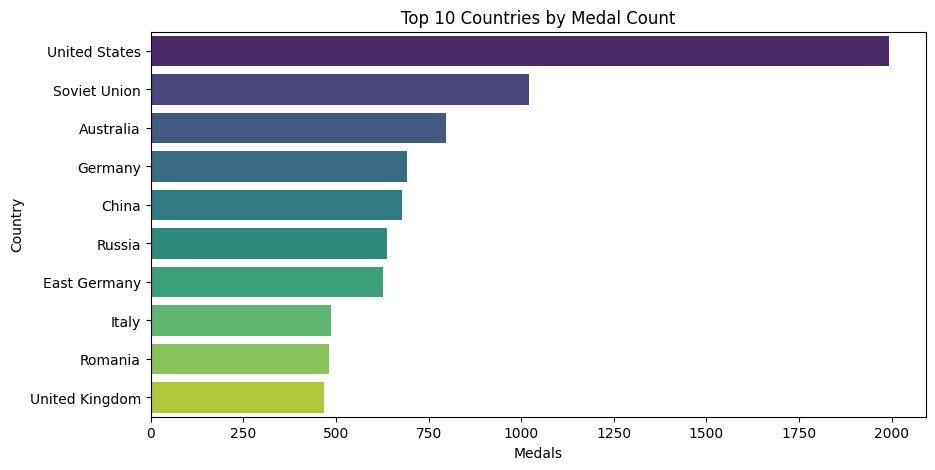

In [ ]:
#Bar Chart: Top Countries

plt.figure(figsize=(10,5))
sns.barplot(x=country_medals.values, y=country_medals.index,hue=None, palette="viridis",legend=False)
plt.title("Top 10 Countries by Medal Count")
plt.xlabel("Medals")
plt.ylabel("Country")
plt.show()


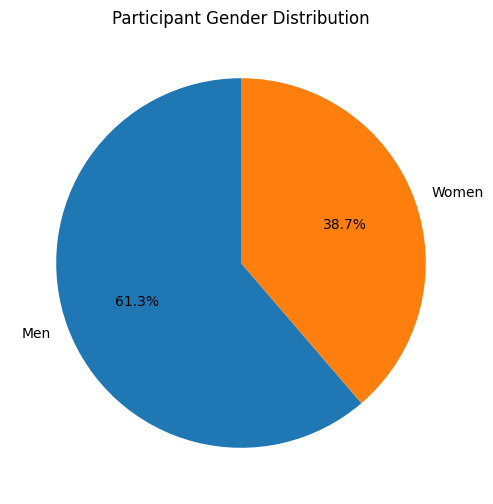

In [ ]:
#Pie Chart: Gender Split
plt.figure(figsize=(6,6))
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Participant Gender Distribution")
plt.ylabel("")
plt.show()


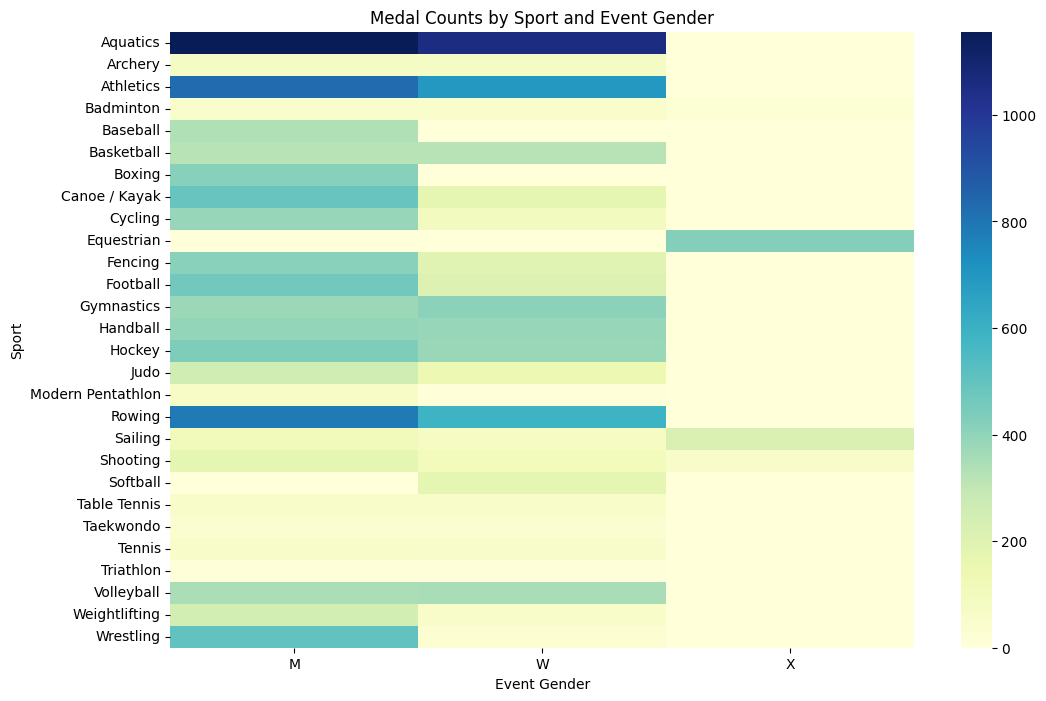

In [ ]:
# Heatmap: Medals by Sport & Event gender_count
# Pivot table: rows=Sport, cols=Event_gender, values=count
pivot = (
    medalists
    .groupby(["Sport","Event_gender"])
    .size()
    .unstack(fill_value=0)
)
plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Medal Counts by Sport and Event Gender")
plt.xlabel("Event Gender")
plt.ylabel("Sport")
plt.show()


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Load your cleaned DataFrame
df = pd.read_csv("Summer_Olympic_medals.csv", encoding = 'latin1')

df["Won_Medal"] = df["Medal"].apply(lambda x: 1 if x in ['Gold','Silver','Bronze'] else 0)


# Verify distribution
print(df['Won_Medal'].value_counts())


Won_Medal
1    15316
0      117
Name: count, dtype: int64


In [ ]:
#Encode the categoricals (here, using pandas.get_dummies to guarantee dense X)
X = pd.get_dummies(
    df[['Year','Country_Code','Sport','Gender','Event_gender']],
    drop_first=True
)
y = df['Won_Medal']

In [ ]:
#Stratified split to keep at least one of each class in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
#Check train classes again
print("Train set class distribution:")
print(y_train.value_counts())

Train set class distribution:
Won_Medal
1    12252
0       94
Name: count, dtype: int64


In [ ]:
#Fit the model
model = LogisticRegression(
    max_iter=200, 
    class_weight='balanced', 
    solver='lbfgs', 
    random_state=42
)
model.fit(X_train, y_train) 

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [ ]:
#Evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00      3064

    accuracy                           1.00      3087
   macro avg       1.00      1.00      1.00      3087
weighted avg       1.00      1.00      1.00      3087


Confusion Matrix:
 [[  23    0]
 [   0 3064]]
